In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
import sys
pd.options.mode.chained_assignment = None

### Remembering Research question

>Is there a trend over time to consume more local products?

>    - Are new products mostly using primary resources from Switzerland? Or from other countries inside Europe?
>    - Are new products mostly manufactured in Switzerland? Or from other countries inside Europe?
>    - Is there a trend over time to local products to promote their origin?

### Reading data

In [3]:
DATA_FOLDER = './data/'

In [4]:
openfood_file = "en.openfoodfacts.org.products.csv"
openfood = pd.read_csv(DATA_FOLDER + openfood_file, sep = '\t', low_memory=False)

In [5]:
consSwit_file = "je-f-07.06.02.xlsx"
header_row = 3
consSwit = pd.read_excel(DATA_FOLDER + consSwit_file, header=header_row)
#Remove first rows (with contextual information)
consSwit.drop(consSwit.index[0:2], inplace=True)
#Remove last rows (with duplicate information and contextual information)
consSwit.drop(consSwit.index[23:32], inplace=True)
#Change name of column
consSwit = consSwit.rename(columns={'Unnamed: 0':'products'})
#Set <products> as column
consSwit = consSwit.set_index('products')
#Drop last column, as has partial information of the year and 'etat des produits'
consSwit = consSwit.drop(columns=['Etat des produits', '2016 p'])

In [6]:
invAgr_file = "je-f-07.02.03.02.04.xlsx"
header_row = 2
invAgr = pd.read_excel(DATA_FOLDER + invAgr_file, header=header_row)
#Remove first rows (with contextual information)
invAgr.drop(invAgr.index[0:7], inplace=True)
#Remove last rows (with duplicate information and contextual information)
invAgr.drop(invAgr.index[16:43], inplace=True)
#Change name of column
invAgr = invAgr.rename(columns={'Unnamed: 0':'typeInv'})
invAgr = invAgr.set_index('typeInv')

### Exploration of datasets

##### Consumption Switzerland

> Super Categories

In [7]:
consSwit

,2007,2008,2009,2010,2011,2012,2013,2014,2015
products,,,,,,,,,
Céréales,98.013754,93.737296,96.762305,93.884316,99.974945,91.893762,90.099344,89.972571,92.587820
Pommes de terre,41.778600,46.869346,46.268682,47.817157,44.481201,48.713089,51.708254,41.844096,50.635046
Sucre,43.167207,43.590842,40.974560,37.465394,37.445127,36.370639,40.214113,37.856708,38.065779
Miel,1.348237,1.210427,1.288076,1.321601,1.432108,1.158042,1.392348,1.136757,1.435543
Légumes 1,103.237925,105.738089,108.198836,107.227660,108.150723,106.543807,105.200511,104.577329,104.155867
Fruits 1,118.882028,123.689979,124.171271,119.810187,117.028790,121.106067,119.261679,114.949381,115.087259
jus de légumes et de fruits,29.253410,32.029329,29.792858,26.973705,25.599959,28.426779,27.256378,23.147393,22.569690
Huiles et graisses végétales,16.167350,16.141488,17.108515,17.395802,17.695043,16.176501,17.683895,17.861493,16.843297
Viande,51.799507,52.616272,51.150578,52.402102,52.228737,50.350228,50.541678,50.680753,49.827563


In [8]:
catConsSwit = consSwit.loc[(consSwit.index== 'Céréales')]
catConsSwit = catConsSwit.append(consSwit.loc[(consSwit.index== 'Pommes de terre')])
catConsSwit = catConsSwit.append(consSwit.loc[(consSwit.index== 'Sucre')])
catConsSwit = catConsSwit.append(consSwit.loc[(consSwit.index== 'Miel')])
catConsSwit = catConsSwit.append(consSwit.loc[(consSwit.index== 'Légumes 1')])
catConsSwit = catConsSwit.append(consSwit.loc[(consSwit.index== 'Fruits 1')])
catConsSwit = catConsSwit.append(consSwit.loc[(consSwit.index== 'Huiles et graisses végétales')])
catConsSwit = catConsSwit.append(consSwit.loc[(consSwit.index== 'Viande')])
catConsSwit = catConsSwit.append(consSwit.loc[(consSwit.index== 'Lait et produits laitiers')])
catConsSwit = catConsSwit.append(consSwit.loc[(consSwit.index== 'Oeufs')])
catConsSwit = catConsSwit.append(consSwit.loc[(consSwit.index== 'Poissons et mollusques')])
catConsSwit = catConsSwit.append(consSwit.loc[(consSwit.index== 'Vin')])
catConsSwit

,2007,2008,2009,2010,2011,2012,2013,2014,2015
products,,,,,,,,,
Céréales,98.013754,93.737296,96.762305,93.884316,99.974945,91.893762,90.099344,89.972571,92.587820
Pommes de terre,41.778600,46.869346,46.268682,47.817157,44.481201,48.713089,51.708254,41.844096,50.635046
Sucre,43.167207,43.590842,40.974560,37.465394,37.445127,36.370639,40.214113,37.856708,38.065779
Miel,1.348237,1.210427,1.288076,1.321601,1.432108,1.158042,1.392348,1.136757,1.435543
Légumes 1,103.237925,105.738089,108.198836,107.227660,108.150723,106.543807,105.200511,104.577329,104.155867
Fruits 1,118.882028,123.689979,124.171271,119.810187,117.028790,121.106067,119.261679,114.949381,115.087259
Huiles et graisses végétales,16.167350,16.141488,17.108515,17.395802,17.695043,16.176501,17.683895,17.861493,16.843297
Viande,51.799507,52.616272,51.150578,52.402102,52.228737,50.350228,50.541678,50.680753,49.827563
Lait et produits laitiers,255.683841,252.642256,245.855948,248.891431,252.199542,247.679618,251.584253,248.167039,246.696216


##### OpenFoodSwitzerland

The first decision is to narrow down the search, just for Switzerland products

In [9]:
foodSwitzerland = openfood[openfood['countries_tags']=="en:switzerland"]

In [10]:
nbProdSwit = len(foodSwitzerland)
print("Number of products: ", nbProdSwit)
foodSwitzerland.head()

Number of products:  13454


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
285,0000003301098,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1527593074,2018-05-29T11:24:34Z,1527593109,2018-05-29T11:25:09Z,Mini cuchaule au beurre,NaN,100 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,0000013000004,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1484431999,2017-01-14T22:13:19Z,1484432028,2017-01-14T22:13:48Z,Kochspeck,NaN,686 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1040,00025393,http://world-en.openfoodfacts.org/product/0002...,openfoodfacts-contributors,1530019114,2018-06-26T13:18:34Z,1530019311,2018-06-26T13:21:51Z,Salade de lentilles,NaN,200 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1329,0007200000021,http://world-en.openfoodfacts.org/product/0007...,date-limite-app,1418991821,2014-12-19T12:23:41Z,1442754589,2015-09-20T13:09:49Z,Sauce bolognaise,NaN,420 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2171,0010000002218,http://world-en.openfoodfacts.org/product/0010...,date-limite-app,1442659864,2015-09-19T10:51:04Z,1461430836,2016-04-23T17:00:36Z,Ikea Lachs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Date type preprocessing

In [11]:
print("Date of first upload: ", min(foodSwitzerland['created_datetime']))
print("Date of last upload retrieved: ", max(foodSwitzerland['created_datetime']))

Date of first upload:  2012-05-16T18:33:35Z
Date of last upload retrieved:  2018-11-23T08:40:49Z


In [12]:
foodSwitzerland['created_datetime'] = pd.to_datetime(foodSwitzerland['created_datetime'])
foodSwitzerland = foodSwitzerland.sort_values(by='created_datetime')

Quantity preprocessing

In [13]:
foodSwitzerland['serving_quantity'] = pd.to_numeric(foodSwitzerland['serving_quantity'])
foodSwitzerland['serving_quantity'] = foodSwitzerland['serving_quantity'].replace(0, np.NaN)

In [14]:
sum(pd.isna(foodSwitzerland['serving_size']))+sum(foodSwitzerland['serving_size']==0)

8010

In [15]:
sum(pd.isna(foodSwitzerland['serving_quantity']))+sum(foodSwitzerland['serving_quantity']==0)

8155

In [16]:
sum(pd.isna(foodSwitzerland['quantity']))+sum(foodSwitzerland['quantity']==0)

6558

Differentiating origins/manufacture/labels

In [17]:
filter_ch = '[Ss]witzerland|[Ss]uisse|[Ss]chweiz|[Ss]vizerra'
filter_local = '[Ss]witzerland|[Ss]uisse|[Ss]chweiz|[Ss]vizerra|[Ll]ocal'

place = pd.Series(['Other country','Switzerland', 'No information'], index=[0,1,2])
refLabel = pd.Series(['Other Label','Switzerland', 'No information'], index=[0,1,2]) 

foodSwitzerland["originsCat"] = foodSwitzerland["origins"].str.contains(filter_ch,regex=True).map(place,na_action='ignore')
foodSwitzerland["manuCat"] = foodSwitzerland["manufacturing_places"].str.contains(filter_ch,regex=True).map(place,na_action='ignore')
foodSwitzerland["labCat"] = foodSwitzerland["labels_tags"].str.contains(filter_local,regex=True).map(refLabel,na_action='ignore') 

Re-categorization from 'categories' to the categories in the Swiss consumption dataset

In [18]:
filter_cere = '[Cc]éréal|[Pp]ain'
filter_pomm = '[Pp]omme de terre'
filter_sucr = '[Ss]ucre '
filter_miel = '[Mm]iel'
filter_legu = '[Ll]égume|[Ll]entilles|[Cc]ornichon|[Pp]oivre|[Cc]hampignon|[Hh]Haricots'
filter_frui = '[Ss]irop|[Jj]us|[Ff]ruit]|[Aa]liments et boissons à base de végétaux|[Pp]flanzliche Lebensmittel und Getränke|[Bb]oissons aux fruits|[Pp]lant-based foods and beverages'
filter_huil = '[Hh]uile'
filter_vian = '[Jj]ambon|[Vv]iandes|[Vv]iande|[Cc]harcuteries'
filter_lait = '[Yy]aourts|[Yy]ogourt|[Pp]roduits laitiers|[Jj]oghurt|[Yy]aourts aux fruits|[Bb]oissons lactées|[Ll]aits entiers|[Pp]roduit laitier|[Ff]romage|[Dd]airies|[Cc]heeses|[Cc]ream cheeses|[Bb]utter|[Mm]]ilk'
filter_oeuf = '[Oo]euf|[Ee]ggs'
filter_pois = '[Pp]oisson|[Pp]oissons surgelés|[Ff]ilets de perche'
filter_vin = '[Vv]in|[Ww]ine|[Ww]ein'

cereales = foodSwitzerland[(foodSwitzerland.product_name.str.contains(filter_cere,regex=True) | (foodSwitzerland.generic_name.str.contains(filter_cere,regex=True))| (foodSwitzerland.categories.str.contains(filter_cere,regex=True)))]
pomme = foodSwitzerland[(foodSwitzerland.product_name.str.contains(filter_pomm,regex=True) | (foodSwitzerland.generic_name.str.contains(filter_pomm,regex=True))| (foodSwitzerland.categories.str.contains(filter_pomm,regex=True)))]
sucre = foodSwitzerland[(foodSwitzerland.product_name.str.contains(filter_sucr,regex=True) | (foodSwitzerland.generic_name.str.contains(filter_sucr,regex=True))| (foodSwitzerland.categories.str.contains(filter_sucr,regex=True)))]
miel = foodSwitzerland[(foodSwitzerland.product_name.str.contains(filter_miel,regex=True) | (foodSwitzerland.generic_name.str.contains(filter_miel,regex=True))| (foodSwitzerland.categories.str.contains(filter_miel,regex=True)))]
legumes = foodSwitzerland[(foodSwitzerland.product_name.str.contains(filter_legu,regex=True) | (foodSwitzerland.generic_name.str.contains(filter_legu,regex=True))| (foodSwitzerland.categories.str.contains(filter_legu,regex=True)))]
fruits = foodSwitzerland[(foodSwitzerland.product_name.str.contains(filter_frui,regex=True) | (foodSwitzerland.generic_name.str.contains(filter_frui,regex=True))| (foodSwitzerland.categories.str.contains(filter_frui,regex=True)))]
huiles = foodSwitzerland[(foodSwitzerland.product_name.str.contains(filter_huil,regex=True) | (foodSwitzerland.generic_name.str.contains(filter_huil,regex=True))| (foodSwitzerland.categories.str.contains(filter_huil,regex=True)))]
viande = foodSwitzerland[(foodSwitzerland.product_name.str.contains(filter_vian,regex=True) | (foodSwitzerland.generic_name.str.contains(filter_vian,regex=True))| (foodSwitzerland.categories.str.contains(filter_vian,regex=True)))]
lait =foodSwitzerland[(foodSwitzerland.product_name.str.contains(filter_lait,regex=True) | (foodSwitzerland.generic_name.str.contains(filter_lait,regex=True))| (foodSwitzerland.categories.str.contains(filter_lait,regex=True)))]
oeuf =foodSwitzerland[(foodSwitzerland.product_name.str.contains(filter_oeuf,regex=True) | (foodSwitzerland.generic_name.str.contains(filter_oeuf,regex=True))| (foodSwitzerland.categories.str.contains(filter_oeuf,regex=True)))]
pois = foodSwitzerland[(foodSwitzerland.product_name.str.contains(filter_pois,regex=True) | (foodSwitzerland.generic_name.str.contains(filter_pois,regex=True))| (foodSwitzerland.categories.str.contains(filter_pois,regex=True)))]
vin = foodSwitzerland[(foodSwitzerland.product_name.str.contains(filter_vin,regex=True) | (foodSwitzerland.generic_name.str.contains(filter_vin,regex=True))| (foodSwitzerland.categories.str.contains(filter_vin,regex=True)))]

In [19]:
len(cereales)+len(pomme)+len(sucre)+len(miel)+len(legumes)+len(fruits)+len(huiles)+len(viande)+len(lait)+len(oeuf)+len(pois)+len(vin)

2163

In [230]:
print(cereales.originsCat.describe())
print('===================')
if (cereales.originsCat.describe().top=='Switzerland'):
    propCer = cereales.originsCat.describe().freq/cereales.originsCat.count()
else:
    propCer = (cereales.originsCat.count()-cereales.originsCat.describe().freq)/cereales.originsCat.count()
print ("proportion of origin Switzerland in 'céréales' category in the dataset: ", propCer)

count              33
unique              2
top       Switzerland
freq               23
Name: originsCat, dtype: object
proportion of origin Switzerland in 'céréales' category in the dataset:  0.696969696969697


In [231]:
print(pomme.originsCat.describe())
print('===================')

if (cereales.originsCat.describe().top=='Switzerland'):
    propPom = pomme.originsCat.describe().freq/pomme.originsCat.count()
else:
    propPom = (pomme.originsCat.count()-pomme.originsCat.describe().freq)/pomme.originsCat.count()

print ("proportion of origin Switzerland in 'pomme de terre' category in the dataset: ",propPom)

count               3
unique              1
top       Switzerland
freq                3
Name: originsCat, dtype: object
proportion of origin Switzerland in 'pomme de terre' category in the dataset:  1.0


In [232]:
print(sucre.originsCat.describe())
print('===================')

if (sucre.originsCat.describe().top=='Switzerland'):
    propSuc = sucre.originsCat.describe().freq/sucre.originsCat.count()
else:
    propSuc = (sucre.originsCat.count()-sucre.originsCat.describe().freq)/sucre.originsCat.count()
    
print ("proportion of origin Switzerland in 'Sucre' category in the dataset: ", propSuc)

count                19
unique                2
top       Other country
freq                 10
Name: originsCat, dtype: object
proportion of origin Switzerland in 'Sucre' category in the dataset:  0.47368421052631576


In [233]:
print(miel.originsCat.describe())
print('===================')

if (sucre.originsCat.describe().top=='Switzerland'):
    propMie = miel.originsCat.describe().freq/miel.originsCat.count()
else:
    propMie = (miel.originsCat.count()-miel.originsCat.describe().freq)/miel.originsCat.count()
    
print ("proportion of origin Switzerland in 'Miel' category in the dataset: ",propMie)

count                 4
unique                2
top       Other country
freq                  3
Name: originsCat, dtype: object
proportion of origin Switzerland in 'Miel' category in the dataset:  0.25


In [234]:
print(legumes.originsCat.describe())
print('===================')

if (legumes.originsCat.describe().top=='Switzerland'):
    propLeg = legumes.originsCat.describe().freq/legumes.originsCat.count()
else:
    propLeg = (legumes.originsCat.count()-legumes.originsCat.describe().freq)/legumes.originsCat.count()

print ("proportion of origin Switzerland in 'Legumes' category in the dataset: ",propLeg)

count              35
unique              2
top       Switzerland
freq               21
Name: originsCat, dtype: object
proportion of origin Switzerland in 'Legumes' category in the dataset:  0.6


In [235]:
print(fruits.originsCat.describe())
print('===================')

if (fruits.originsCat.describe().top=='Switzerland'):
    propFru = fruits.originsCat.describe().freq/fruits.originsCat.count()
else:
    propfru = (fruits.originsCat.count()-fruits.originsCat.describe().freq)/fruits.originsCat.count()
    
print ("proportion of origin Switzerland in 'Fruits' category in the dataset: ",propFru)

count              51
unique              2
top       Switzerland
freq               30
Name: originsCat, dtype: object
proportion of origin Switzerland in 'Fruits' category in the dataset:  0.5882352941176471


In [236]:
print(huiles.originsCat.describe())
print('===================')

if (huiles.originsCat.describe().top=='Switzerland'):
    propHui = huiles.originsCat.describe().freq/huiles.originsCat.count()
else:
    propHui = (huiles.originsCat.count()-huiles.originsCat.describe().freq)/huiles.originsCat.count()

print ("proportion of origin Switzerland in 'Huiles' category in the dataset: ",propHui)

count                 6
unique                2
top       Other country
freq                  4
Name: originsCat, dtype: object
proportion of origin Switzerland in 'Huiles' category in the dataset:  0.3333333333333333


In [237]:
print(viande.originsCat.describe())
print('===================')

if (viande.originsCat.describe().top=='Switzerland'):
    propVia = viande.originsCat.describe().freq/viande.originsCat.count()
else:
    propVia = (viande.originsCat.count()-viande.originsCat.describe().freq)/viande.originsCat.count()
    
print ("proportion of origin Switzerland in 'Viande' category in the dataset: ",propVia)

count              57
unique              2
top       Switzerland
freq               52
Name: originsCat, dtype: object
proportion of origin Switzerland in 'Viande' category in the dataset:  0.9122807017543859


In [238]:
print(lait.originsCat.describe())
print('===================')

if (lait.originsCat.describe().top=='Switzerland'):
    propLai = lait.originsCat.describe().freq/lait.originsCat.count()
else:
    propLai = (lait.originsCat.count()-lait.originsCat.describe().freq)/lait.originsCat.count()

print ("proportion of origin Switzerland in 'Produits Latiers' category in the dataset: ",propLai)

count              98
unique              2
top       Switzerland
freq               85
Name: originsCat, dtype: object
proportion of origin Switzerland in 'Produits Latiers' category in the dataset:  0.8673469387755102


In [239]:
print(oeuf.originsCat.describe())
print('===================')

if (oeuf.originsCat.describe().top=='Switzerland'):
    propOeu = oeuf.originsCat.describe().freq/oeuf.originsCat.count()
else:
    propOeu = (oeuf.originsCat.count()-oeuf.originsCat.describe().freq)/oeuf.originsCat.count()

print ("proportion of origin Switzerland in 'Oeuf' category in the dataset: ", propOeu)

count              25
unique              2
top       Switzerland
freq               24
Name: originsCat, dtype: object
proportion of origin Switzerland in 'Oeuf' category in the dataset:  0.96


In [240]:
print(pois.originsCat.describe())
print('===================')

if (pois.originsCat.describe().top=='Switzerland'):
    propPoi = pois.originsCat.describe().freq/pois.originsCat.count()
else:
    propPoi = (pois.originsCat.count()-pois.originsCat.describe().freq)/pois.originsCat.count()

print ("proportion of origin Switzerland in 'Poissons et mollusques' category in the dataset: ", propPoi)

count                15
unique                2
top       Other country
freq                 12
Name: originsCat, dtype: object
proportion of origin Switzerland in 'Poissons et mollusques' category in the dataset:  0.2


In [241]:
print(vin.originsCat.describe())
print('===================')

if (vin.originsCat.describe().top=='Switzerland'):
    propVin = vin.originsCat.describe().freq/vin.originsCat.count()
else:
    propVin = (vin.originsCat.count()-vin.originsCat.describe().freq)/vin.originsCat.count()

print ("proportion of origin Switzerland in 'Vin' category in the dataset: ",propVin)

count               5
unique              2
top       Switzerland
freq                3
Name: originsCat, dtype: object
proportion of origin Switzerland in 'Vin' category in the dataset:  0.6


For having the kg/pers of products with origin in Switzerland over the years

In [242]:
catConsSwitOS = pd.DataFrame(index = catConsSwit.index, columns = catConsSwit.columns)
catConsSwitOS.iloc[(catConsSwitOS.index== 'Céréales')] = propCer*catConsSwit.iloc[(catConsSwitOS.index== 'Céréales')]
catConsSwitOS.iloc[(catConsSwitOS.index== 'Pommes de terre')] = propPom*catConsSwit.iloc[(catConsSwitOS.index== 'Pommes de terre')]
catConsSwitOS.iloc[(catConsSwitOS.index== 'Sucre')] = propSuc*catConsSwit.iloc[(catConsSwitOS.index== 'Sucre')]
catConsSwitOS.iloc[(catConsSwitOS.index== 'Miel')] = propMie*catConsSwit.iloc[(catConsSwitOS.index== 'Miel')]
catConsSwitOS.iloc[(catConsSwitOS.index== 'Légumes 1')] = propLeg*catConsSwit.iloc[(catConsSwitOS.index== 'Légumes 1')]
catConsSwitOS.iloc[(catConsSwitOS.index== 'Fruits 1')] = propFru*catConsSwit.iloc[(catConsSwitOS.index== 'Fruits 1')]
catConsSwitOS.iloc[(catConsSwitOS.index== 'Huiles et graisses végétales')] = propHui*catConsSwit.iloc[(catConsSwitOS.index== 'Huiles et graisses végétales')]
catConsSwitOS.iloc[(catConsSwitOS.index== 'Viande')] = propVia*catConsSwit.iloc[(catConsSwitOS.index== 'Viande')]
catConsSwitOS.iloc[(catConsSwitOS.index== 'Lait et produits laitiers')] = propLai*catConsSwit.iloc[(catConsSwitOS.index== 'Lait et produits laitiers')]
catConsSwitOS.iloc[(catConsSwitOS.index== 'Oeufs')] = propOeu*catConsSwit.iloc[(catConsSwitOS.index== 'Oeufs')]
catConsSwitOS.iloc[(catConsSwitOS.index== 'Poissons et mollusques')] = propPoi*catConsSwit.iloc[(catConsSwitOS.index== 'Poissons et mollusques')]
catConsSwitOS.iloc[(catConsSwitOS.index== 'Vin')] = propVin*catConsSwit.iloc[(catConsSwitOS.index== 'Vin')]
catConsSwitOS

,2007,2008,2009,2010,2011,2012,2013,2014,2015
products,,,,,,,,,
Céréales,68.3126,65.3321,67.4404,65.4345,69.6795,64.0472,62.7965,62.7082,64.5309
Pommes de terre,41.7786,46.8693,46.2687,47.8172,44.4812,48.7131,51.7083,41.8441,50.635
Sucre,20.4476,20.6483,19.409,17.7468,17.7372,17.2282,19.0488,17.9321,18.0312
Miel,0.337059,0.302607,0.322019,0.3304,0.358027,0.289511,0.348087,0.284189,0.358886
Légumes 1,61.9428,63.4429,64.9193,64.3366,64.8904,63.9263,63.1203,62.7464,62.4935
Fruits 1,69.9306,72.7588,73.0419,70.4766,68.8405,71.2389,70.1539,67.6173,67.6984
Huiles et graisses végétales,5.38912,5.3805,5.70284,5.7986,5.89835,5.39217,5.89463,5.95383,5.61443
Viande,47.2557,48.0008,46.6637,47.8054,47.6473,45.9335,46.1082,46.2351,45.4567
Lait et produits laitiers,221.767,219.128,213.242,215.875,218.745,214.824,218.211,215.247,213.971


In [243]:
catConsSwitOS.agg(['sum'])

,2007,2008,2009,2010,2011,2012,2013,2014,2015
sum,573.135493,577.565663,572.390493,571.36748,572.654622,565.372705,571.614811,554.164678,562.128627


Total consumption over the years

In [244]:
catConsSwit

,2007,2008,2009,2010,2011,2012,2013,2014,2015
products,,,,,,,,,
Céréales,98.013754,93.737296,96.762305,93.884316,99.974945,91.893762,90.099344,89.972571,92.587820
Pommes de terre,41.778600,46.869346,46.268682,47.817157,44.481201,48.713089,51.708254,41.844096,50.635046
Sucre,43.167207,43.590842,40.974560,37.465394,37.445127,36.370639,40.214113,37.856708,38.065779
Miel,1.348237,1.210427,1.288076,1.321601,1.432108,1.158042,1.392348,1.136757,1.435543
Légumes 1,103.237925,105.738089,108.198836,107.227660,108.150723,106.543807,105.200511,104.577329,104.155867
Fruits 1,118.882028,123.689979,124.171271,119.810187,117.028790,121.106067,119.261679,114.949381,115.087259
Huiles et graisses végétales,16.167350,16.141488,17.108515,17.395802,17.695043,16.176501,17.683895,17.861493,16.843297
Viande,51.799507,52.616272,51.150578,52.402102,52.228737,50.350228,50.541678,50.680753,49.827563
Lait et produits laitiers,255.683841,252.642256,245.855948,248.891431,252.199542,247.679618,251.584253,248.167039,246.696216


In [245]:
catConsSwit.agg(['sum'])

,2007,2008,2009,2010,2011,2012,2013,2014,2015
sum,787.954435,793.67941,788.764492,783.756114,786.238586,774.398704,783.114418,761.10942,769.04365


Proportion of consumption of products with origin in Switzerland w.r.t total products

In [246]:
propConsSwit = catConsSwitOS.agg(['sum'])/catConsSwit.agg(['sum'])
propConsSwit

,2007,2008,2009,2010,2011,2012,2013,2014,2015
sum,0.727371,0.727706,0.72568,0.729012,0.728347,0.73008,0.729925,0.728101,0.730945


Text(0.5, 1.0, 'Proportion of consumption of products with origin in Switzerland')

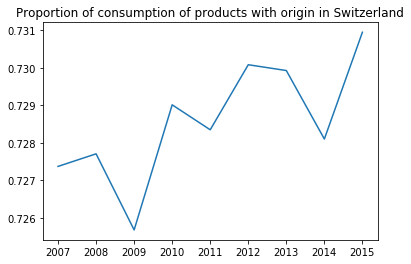

In [247]:
plt.plot(propConsSwit.T)
plt.title('Proportion of consumption of products with origin in Switzerland')

__Assumptions:__ 

->The 'set of products' is the same for all the years, and therefore the number of products-made-in-Switzerland is constant in time. This assumption implies that Switzerland is a stable market, in wich there is no product innovation.

->All products in the same category have the same quantity

__Conclusion:__ There is a trend over time to consume more products with origin in Switzerland. That may be mostly explained because over the years, the categories with most consumption are milk derivatives, vegetables, fruits and potatoes, categories which has products that has mostly primary sources from Switzerland. 

__Possible improvements:__ 

->As the products are taken from a dataset (openfoodfact) that has not complete information of all the products consumed in Switzerland, a bootstraping process could be useful, in order to give confidence intervals to the resultant 'proportion of consumption of products'

->Account by difference in products' quantities within the categories

->Improve filters of categories

->Do it by subcategory

->Explore not only 'origin Switzerland' but also 'manufactured in Switzerland'

->Reduce NaN in 'origins' and 'serving_quantity'. Use of predictive models for NaN observations(?)

->Divide the timeframe by periods, calculating for each period, the proportion of 'origin_Switzerland'. This is, tackling the assumption that for every year, the products in the market are the same.

### Introducing confidence to our results

In [248]:
prop = np.zeros((100,12))
temp = []
tempCatConsSwitOS = pd.DataFrame(index = catConsSwit.index, columns = catConsSwit.columns)
propConsSwitOS = np.zeros((100,9))
for iteration in range(0,100):
    #temporal samples
    c0 = cereales.originsCat.sample(n=len(cereales), replace=True)
    c1 = pomme.originsCat.sample(n=len(pomme), replace=True)
    c2 = sucre.originsCat.sample(n=len(sucre), replace=True)
    c3 = miel.originsCat.sample(n=len(miel), replace=True)
    c4 = legumes.originsCat.sample(n=len(legumes), replace=True)
    c5 = fruits.originsCat.sample(n=len(fruits), replace=True)
    c6 = huiles.originsCat.sample(n=len(huiles), replace=True)
    c7 = viande.originsCat.sample(n=len(viande), replace=True)
    c8 = lait.originsCat.sample(n=len(lait), replace=True)
    c9 = oeuf.originsCat.sample(n=len(oeuf), replace=True)
    c10 = pois.originsCat.sample(n=len(pois), replace=True)
    c11 = vin.originsCat.sample(n=len(vin), replace=True)
    
    temp.append(c0);temp.append(c1); temp.append(c2);temp.append(c3); temp.append(c4); temp.append(c5); temp.append(c6);temp.append(c7); temp.append(c8); temp.append(c9); temp.append(c10);temp.append(c11)
    
    #temporal proportions
    for i in range (0,len(temp)):
        if (not pd.isnull(temp[i]).all()):
            if (temp[i].value_counts().idxmax()=='Switzerland'):
                prop[iteration][i] = temp[i].describe().freq/temp[i].count()
            else:
                prop[iteration][i] = (temp[i].count()-temp[i].describe().freq)/temp[i].count()
        else:
            prop[iteration][i] = np.nan
    
    #For having the kg/pers of products with origin in Switzerland over the years
    for i in range (0,len(tempCatConsSwitOS)):
        tempCatConsSwitOS.iloc[i] = prop[iteration][i]*catConsSwit.iloc[i]
    
    #proportion of kg of products consumed that have origin Switzerland
    propConsSwitOS[iteration] = tempCatConsSwitOS.agg(['sum'])/catConsSwit.agg(['sum'])
    
    #clear temporal arrays for next iteration
    temp.clear()
    tempCatConsSwitOS.iloc[0:0]

#std by year
propCATstd = np.nanstd(propConsSwitOS, axis=0)

In [249]:
propCATstd

array([0.02821326, 0.02851967, 0.02860688, 0.02854997, 0.0282566 ,
       0.02864053, 0.02873415, 0.02800433, 0.02868591])

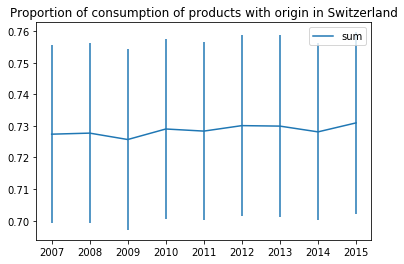

In [250]:
propConsSwit.T.plot(kind='line', yerr = propCATstd,title='Proportion of consumption of products with origin in Switzerland')

__Assumptions:__ 

->The 'set of products' is the same for all the years, and therefore the number of products-made-in-Switzerland is constant in time. This assumption implies that Switzerland is a stable market, in wich there is no product innovation.

->All products in the same category have the same quantity

__Conclusion:__ 
As the confidence intervals suggest the proportion of consumption of products-with-origin-in-Switzerland is statistically the same for all the nine years of study. This would be against the initial hypothesis that "we are consuming more local".
Even if the results are likely-looking, a more accurate study should take into account the new-products that were consumed each year (this is, tackle the assumption of no product innovation). 

__Possible improvements:__ 

->Account by difference in products' quantities within the categories

->Improve filters of categories

->Do it by subcategory

->Explore not only 'origin Switzerland' but also 'manufactured in Switzerland'

->Reduce NaN in 'origins' and 'serving_quantity'. Use of predictive models for NaN observations(?)

->Divide the timeframe by periods, calculating for each period, the proportion of 'origin_Switzerland'. This is, tackling the assumption that for every year, the products in the market are the same.

### Accounting by difference in products' quantities within the categories

Unifying quantities measures.
Take into account that the portions in certain packages are higher that others (useful as our consumption is in kg)
With that purpose, compare the mean value of the 'quantity size' of the products of origin Switzerland with the rest. If is smaller than the mean size, it has sense that the consumption attributable to those products be also smaller.
If there is not information in a category for the quantity size of its products, we assume that the products of Switzerland has the same quantity size than the rest

In [100]:
cereales.groupby(by=['originsCat'])['serving_quantity'].mean()
if (cereales['originsCat'].describe().unique()[1]==2 and not np.isnan(cereales.groupby(by=['originsCat'])['serving_quantity'].mean()['Other country']) and not np.isnan(cereales.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland'])):
    aveQ = ((cereales.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland']+cereales.groupby(by=['originsCat'])['serving_quantity'].mean()['Other country'])/2)
    propCQuanOS = cereales.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland']/aveQ
else:
    propCQuanOS = 1
propCQuanOS

0.9734199645599527

In [103]:
pomme.groupby(by=['originsCat'])['serving_quantity'].mean()
if (pomme['originsCat'].describe().unique()[1]==2 and not np.isnan(pomme.groupby(by=['originsCat'])['serving_quantity'].mean()['Other country']) and not np.isnan(pomme.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland'])):
    aveQ = ((pomme.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland']+pomme.groupby(by=['originsCat'])['serving_quantity'].mean()['Other country'])/2)
    propPQuanOS = pomme.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland']/aveQ
else:
    propPQuanOS = 1
propPQuanOS

1

In [106]:
sucre.groupby(by=['originsCat'])['serving_quantity'].mean()
if (sucre['originsCat'].describe().unique()[1]==2 and not np.isnan(sucre.groupby(by=['originsCat'])['serving_quantity'].mean()['Other country']) and not np.isnan(sucre.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland'])):
    aveQ = ((sucre.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland']+sucre.groupby(by=['originsCat'])['serving_quantity'].mean()['Other country'])/2)
    propSQuanOS = sucre.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland']/aveQ
else:
    propSQuanOS = 1
propSQuanOS

1

In [107]:
miel.groupby(by=['originsCat'])['serving_quantity'].mean()
if (miel['originsCat'].describe().unique()[1]==2 and not np.isnan(miel.groupby(by=['originsCat'])['serving_quantity'].mean()['Other country']) and not np.isnan(miel.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland'])):
    aveQ = ((miel.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland']+miel.groupby(by=['originsCat'])['serving_quantity'].mean()['Other country'])/2)
    propMQuanOS = miel.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland']/aveQ
else:
    propMQuanOS = 1
propMQuanOS

1.6666666666666667

In [108]:
legumes.groupby(by=['originsCat'])['serving_quantity'].mean()
if (legumes['originsCat'].describe().unique()[1]==2 and not np.isnan(legumes.groupby(by=['originsCat'])['serving_quantity'].mean()['Other country']) and not np.isnan(legumes.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland'])):
    aveQ = ((legumes.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland']+legumes.groupby(by=['originsCat'])['serving_quantity'].mean()['Other country'])/2)
    propLQuanOS = legumes.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland']/aveQ
else:
    propLQuanOS = 1
propLQuanOS

1.2534359538207809

In [109]:
fruits.groupby(by=['originsCat'])['serving_quantity'].mean()
if (fruits['originsCat'].describe().unique()[1]==2 and not np.isnan(fruits.groupby(by=['originsCat'])['serving_quantity'].mean()['Other country']) and not np.isnan(fruits.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland'])):
    aveQ = ((fruits.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland']+fruits.groupby(by=['originsCat'])['serving_quantity'].mean()['Other country'])/2)
    propFQuanOS = fruits.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland']/aveQ
else:
    propFQuanOS = 1
propFQuanOS

1.1572978623030887

In [110]:
huiles.groupby(by=['originsCat'])['serving_quantity'].mean()
if (huiles['originsCat'].describe().unique()[1]==2 and not np.isnan(huiles.groupby(by=['originsCat'])['serving_quantity'].mean()['Other country']) and not np.isnan(huiles.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland'])):
    aveQ = ((huiles.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland']+huiles.groupby(by=['originsCat'])['serving_quantity'].mean()['Other country'])/2)
    propHQuanOS = huiles.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland']/aveQ
    propHQuanOS = 1
propHQuanOS

1

In [111]:
viande.groupby(by=['originsCat'])['serving_quantity'].mean()
if (viande['originsCat'].describe().unique()[1]==2 and not np.isnan(viande.groupby(by=['originsCat'])['serving_quantity'].mean()['Other country']) and not np.isnan(viande.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland'])):
    aveQ = ((viande.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland']+viande.groupby(by=['originsCat'])['serving_quantity'].mean()['Other country'])/2)
    propVQuanOS = viande.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland']/aveQ
else:
    propVQuanOS = 1
propVQuanOS

0.9212620807276862

In [112]:
lait.groupby(by=['originsCat'])['serving_quantity'].mean()
if (lait['originsCat'].describe().unique()[1]==2 and not np.isnan(lait.groupby(by=['originsCat'])['serving_quantity'].mean()['Other country']) and not np.isnan(lait.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland'])):
    aveQ = ((lait.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland']+lait.groupby(by=['originsCat'])['serving_quantity'].mean()['Other country'])/2)
    propLQuanOS = lait.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland']/aveQ
else:
    propLQuanOS = 1
propLQuanOS

1.2590125535263332

In [113]:
oeuf.groupby(by=['originsCat'])['serving_quantity'].mean()
if (oeuf['originsCat'].describe().unique()[1]==2 and not np.isnan(oeuf.groupby(by=['originsCat'])['serving_quantity'].mean()['Other country']) and not np.isnan(oeuf.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland'])):
    aveQ = ((oeuf.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland']+oeuf.groupby(by=['originsCat'])['serving_quantity'].mean()['Other country'])/2)
    propOQuanOS = oeuf.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland']/aveQ
else:
    propOQuanOS = 1
propOQuanOS

1

In [114]:
pois.groupby(by=['originsCat'])['serving_quantity'].mean()
if (pois['originsCat'].describe().unique()[1]==2 and not np.isnan(pois.groupby(by=['originsCat'])['serving_quantity'].mean()['Other country']) and not np.isnan(pois.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland'])):
    aveQ = ((pois.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland']+pois.groupby(by=['originsCat'])['serving_quantity'].mean()['Other country'])/2)
    propPOQuanOS = pois.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland']/aveQ
else:
    propPOQuanOS = 1
propPOQuanOS

0.8727272727272727

In [117]:
vin.groupby(by=['originsCat'])['serving_quantity'].mean()
if (vin['originsCat'].describe().unique()[1]==2 and not np.isnan(vin.groupby(by=['originsCat'])['serving_quantity'].mean()['Other country']) and not np.isnan(vin.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland'])):
    aveQ = ((vin.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland']+vin.groupby(by=['originsCat'])['serving_quantity'].mean()['Other country'])/2)
    propVIQuanOS = vin.groupby(by=['originsCat'])['serving_quantity'].mean()['Switzerland']/aveQ
else:
    propVIQuanOS = 1
propVIQuanOS

1

In [251]:
prop = np.zeros((100,12))
propQ = np.zeros((100,12))
temp = []
tempQ = []
tempCatConsSwitOS = pd.DataFrame(index = catConsSwit.index, columns = catConsSwit.columns)
propConsSwitOS = np.zeros((100,9))
for iteration in range(0,100):
    #temporal samples
    c0 = cereales.sample(n=len(cereales), replace=True)
    c1 = pomme.sample(n=len(pomme), replace=True)
    c2 = sucre.sample(n=len(sucre), replace=True)
    c3 = miel.sample(n=len(miel), replace=True)
    c4 = legumes.sample(n=len(legumes), replace=True)
    c5 = fruits.sample(n=len(fruits), replace=True)
    c6 = huiles.sample(n=len(huiles), replace=True)
    c7 = viande.sample(n=len(viande), replace=True)
    c8 = lait.sample(n=len(lait), replace=True)
    c9 = oeuf.sample(n=len(oeuf), replace=True)
    c10 = pois.sample(n=len(pois), replace=True)
    c11 = vin.sample(n=len(vin), replace=True)
    
    #recollect temporal vectors associated with originsCat
    temp.append(c0.originsCat);temp.append(c1.originsCat); temp.append(c2.originsCat);temp.append(c3.originsCat); temp.append(c4.originsCat); temp.append(c5.originsCat); temp.append(c6.originsCat);temp.append(c7.originsCat); temp.append(c8.originsCat); temp.append(c9.originsCat); temp.append(c10.originsCat);temp.append(c11.originsCat)
   
    #recollect temporal vectors associated with serving quantity
    tempQ.append(c0.serving_quantity);tempQ.append(c1.serving_quantity); tempQ.append(c2.serving_quantity);tempQ.append(c3.serving_quantity); tempQ.append(c4.serving_quantity); tempQ.append(c5.serving_quantity); tempQ.append(c6.serving_quantity);tempQ.append(c7.serving_quantity); tempQ.append(c8.serving_quantity); tempQ.append(c9.serving_quantity); tempQ.append(c10.serving_quantity);tempQ.append(c11.serving_quantity)
   
    #temporal proportions Origin
    for i in range (0,len(temp)):
        if (not pd.isnull(temp[i]).all()):
            if (temp[i].value_counts().idxmax()=='Switzerland'):
                prop[iteration][i] = temp[i].describe().freq/temp[i].count()
            else:
                prop[iteration][i] = (temp[i].count()-temp[i].describe().freq)/temp[i].count()
        else:
            prop[iteration][i] = np.nan
    
    #temporal proportions quantity
    for i in range (0,len(temp)):
        #Verify that there are at least one non nan-value for quantity for each category 'switzerland'/'other country'
        sumS = 0
        sumO = 0
        for j in range (0, len(temp[i])):
            if (temp[i].iloc[j]=='Switzerland' and not np.isnan(tempQ[i].iloc[j])):
                sumS = sumS + 1
            if (temp[i].iloc[j]=='Other country' and not np.isnan(tempQ[i].iloc[j])):
                sumO = sumO + 1
        if (np.size(temp[i].value_counts()) and sumS>0 and sumO>0):
            sumQS = 0
            countQS = 0
            sumQO = 0
            countQO = 0
            for j in range (0,len(temp[i])):
                if (temp[i].iloc[j]=='Switzerland'):
                    sumQS = tempQ[i].iloc[j]+sumQS
                    countQS = 1 + countQS
                elif (temp[i].iloc[j]=='Other Country'):
                    sumQO = tempQ[i].iloc[j]+sumQO
                    countQO = 1 + countQO
            if (countQS>0 and countQO>0):
                aveQ = ((sumQS/countQS)+(sumQO/countQO))/2
                propQ[iteration][i] = (sumQS/countQS)/aveQ
            else:
                propQ[iteration][i] = 1
        else:
            propQ[iteration][i] = 1

    #For having the kg/pers of products with origin in Switzerland over the years
    for i in range (0,len(tempCatConsSwitOS)):
        tempCatConsSwitOS.iloc[i] = prop[iteration][i]*propQ[iteration][i]*catConsSwit.iloc[i]
    
    #proportion of kg of products consumed that have origin Switzerland
    propConsSwitOS[iteration] = tempCatConsSwitOS.agg(['sum'])/catConsSwit.agg(['sum'])
    
    #clear temporal arrays for next iteration
    temp.clear()
    tempCatConsSwitOS.iloc[0:0]

#std by year
propCATstd = np.nanstd(propConsSwitOS, axis=0)

In [252]:
propCATstd

array([0.03188904, 0.03203404, 0.03209886, 0.03202388, 0.03174631,
       0.03201639, 0.03200695, 0.03144161, 0.03195421])

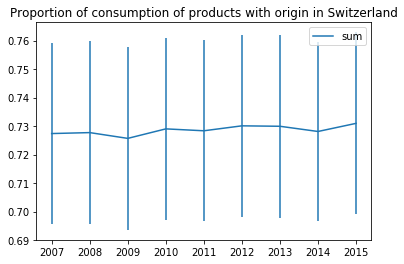

In [253]:
propConsSwit.T.plot(kind='line', yerr = propCATstd,title='Proportion of consumption of products with origin in Switzerland')

__Assumptions:__ 

->The 'set of products' is the same for all the years, and therefore the number of products-made-in-Switzerland is constant in time. This assumption implies that Switzerland is a stable market, in wich there is no product innovation.

->If there are not information on the serving quantity of the products in a category, is asumed all have a homogeneous quantity within the category

__Conclusion:__ 
As the confidence intervals suggest the proportion of consumption of products-with-origin-in-Switzerland is statistically the same for all the nine years of study. This would be against the initial hypothesis that "we are consuming more local".
Even if the results are likely-looking, a more accurate study should take into account the new-products that were consumed each year (this is, tackle the assumption of no product innovation). 

__Possible improvements:__ 

->Improve filters of categories

->Do it by subcategory

->Explore not only 'origin Switzerland' but also 'manufactured in Switzerland'

->Reduce NaN in 'origins' and 'serving_quantity'. Use of predictive models for NaN observations(?)

->Divide the timeframe by periods, calculating for each period, the proportion of 'origin_Switzerland'. This is, tackling the assumption that for every year, the products in the market are the same.

### Other datasets exploration

Consumption Switzerland

> subCategories

In [140]:
subConsSwit = consSwit.loc[(consSwit.index== 'Céréales')]
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'Pommes de terre')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'Sucre')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'Miel')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'Légumes 1')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'jus de légumes et de fruits')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'Huiles et graisses végétales')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'de boeuf')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'de veau')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'de porc')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'de mouton')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'de chèvre et de cheval')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'Volaille')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'Lait de consommation')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'Yogourt')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'Fromage y compris séré')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'Beurre')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'Oeufs')])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'Vin')])
subConsSwit

,2007,2008,2009,2010,2011,2012,2013,2014,2015
products,,,,,,,,,
Céréales,98.013754,93.737296,96.762305,93.884316,99.974945,91.893762,90.099344,89.972571,92.587820
Pommes de terre,41.778600,46.869346,46.268682,47.817157,44.481201,48.713089,51.708254,41.844096,50.635046
Sucre,43.167207,43.590842,40.974560,37.465394,37.445127,36.370639,40.214113,37.856708,38.065779
Miel,1.348237,1.210427,1.288076,1.321601,1.432108,1.158042,1.392348,1.136757,1.435543
Légumes 1,103.237925,105.738089,108.198836,107.227660,108.150723,106.543807,105.200511,104.577329,104.155867
jus de légumes et de fruits,29.253410,32.029329,29.792858,26.973705,25.599959,28.426779,27.256378,23.147393,22.569690
Huiles et graisses végétales,16.167350,16.141488,17.108515,17.395802,17.695043,16.176501,17.683895,17.861493,16.843297
de boeuf,11.104512,11.678009,10.972415,11.116410,11.078811,10.827222,11.337183,11.140308,10.954513
de veau,2.831675,2.715483,2.825663,2.784833,2.799275,2.735075,2.635967,2.540798,2.422341


Wine, cheese and meat: A Swiss Romande classic combination

In [154]:
subConsSwit = consSwit.loc[(consSwit.index== 'de boeuf')]
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'de porc')])
#fromage addition
subConsSwit = subConsSwit.append(consSwit.iloc[18])
subConsSwit = subConsSwit.append(consSwit.loc[(consSwit.index== 'Vin')])
subConsSwit

,2007,2008,2009,2010,2011,2012,2013,2014,2015
products,,,,,,,,,
de boeuf,11.104512,11.678009,10.972415,11.116410,11.078811,10.827222,11.337183,11.140308,10.954513
de porc,25.833793,25.570637,25.098727,25.904411,25.473491,24.072206,24.029038,24.131084,23.396022
Fromage y compris séré,19.563660,19.845201,19.926409,20.253993,19.985223,19.470463,19.746472,19.771726,20.183892
Vin,38.817489,38.085653,37.275728,37.548044,36.259580,35.395622,35.761102,34.617030,34.164420


In [156]:
subConsSwit.T.corr()

products,de boeuf,de porc,Fromage y compris séré,Vin
products,,,,
de boeuf,1.000000,0.322681,0.026813,0.397198
de porc,0.322681,1.000000,0.101389,0.905224
Fromage y compris séré,0.026813,0.101389,1.000000,-0.105948
Vin,0.397198,0.905224,-0.105948,1.000000


##### Agriculture investment

> Super categories

In [77]:
catInvAgr = invAgr.loc[(invAgr.index== 'Administration, exécution et contrôle')]
catInvAgr = catInvAgr.append(invAgr.loc[(invAgr.index== 'Amélioration des bases de production')])
catInvAgr = catInvAgr.append(invAgr.loc[(invAgr.index== 'Production et ventes')])
catInvAgr = catInvAgr.append(invAgr.loc[(invAgr.index== 'Paiements directs et mesures sociales')])
catInvAgr

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
typeInv,,,,,,,,,,,,,,,,,,,,,
"Administration, exécution et contrôle",25.5316,27.9445,34.5693,34.9648,34.5059,33.7511,33.9551,35.3384,37.5954,40.9842,...,103.99,110.646,115.068,118.362,122.594,121.58,122.639,121.9,119.066,115.32
Amélioration des bases de production,228.481,258.363,214.028,225.648,213.423,164.163,156.527,152.18,163.718,157.664,...,200.212,177.771,178.787,143.227,189.71,187.406,181.907,157.544,144.163,135.075
Production et ventes,1484.78,1542.46,1537.93,1476.32,1296.38,1336.69,1336.58,1161.16,1059.1,1445.6,...,611.164,564.031,504.762,517.126,504.27,520.089,500.739,526.136,530.371,531.526
Paiements directs et mesures sociales,774.487,1073.75,1180.01,1486.5,1759.85,1821.01,2237.48,2379.81,2482.57,2383.88,...,2635.51,2839.83,2867.09,2884.3,2894.54,2876.9,2887.22,2861.69,2864.42,2870.05


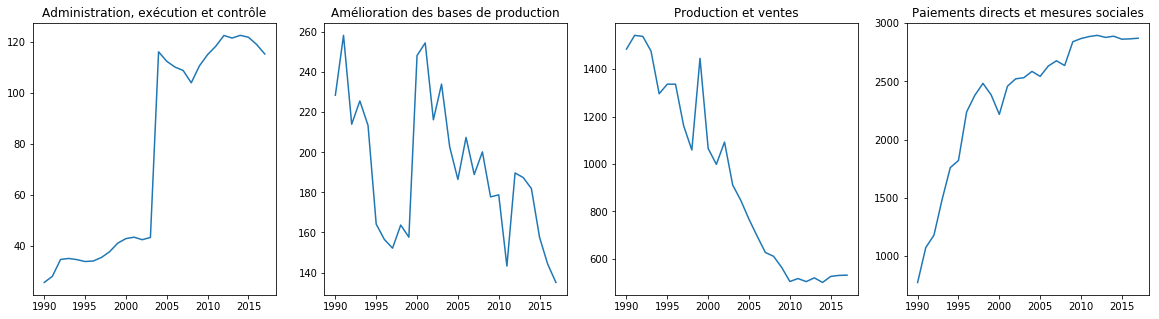

In [78]:
# 3 figures in same output
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
_ = catInvAgr.iloc[0].plot(ax=axes[0], kind='line', title="Administration, exécution et contrôle")
_ = catInvAgr.iloc[1].plot(ax=axes[1], kind='line', title="Amélioration des bases de production")
_ = catInvAgr.iloc[2].plot(ax=axes[2], kind='line', title="Production et ventes")
_ = catInvAgr.iloc[3].plot(ax=axes[3], kind='line', title="Paiements directs et mesures sociales")

> Subcategories

In [79]:
##Lets analyze sub categories
subCatInvAgr = invAgr.drop(invAgr.index[[0,4,8,14]])
subCatInvAgr

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
typeInv,,,,,,,,,,,,,,,,,,,,,
Administration,25.5316,27.9445,34.5693,34.9648,34.5059,33.7511,33.9551,35.3384,37.5954,40.9842,...,47.7666,51.8475,55.2193,55.1342,54.5769,54.2367,55.8413,54.6635,53.7946,51.8627
Vulgarisation,0,0,0,0,0,0,0,0,0,0,...,11.3264,11.15,12.1774,12.0389,12,11.9972,11.9907,11.8702,11.5978,11.6199
Exécution et contrôle,0,0,0,0,0,0,0,0,0,0,...,44.8971,47.6487,47.6711,51.1889,56.017,55.3459,54.8072,55.3661,53.6737,51.8376
Améliorations structurelles,156.629,181.957,132.111,146.864,137.128,92.8777,91.0377,88.0971,95.9802,95.8635,...,139.501,129.792,132,95.9998,141,138.808,134.225,109.943,96.6955,86.3919
Améliorations de l'élevage,39.6888,41.864,46.002,45.1904,44.1103,42.3632,40.5382,38.8595,39.6513,34.2381,...,49.6232,45.8841,45.1557,45.7281,46.8031,46.4854,45.627,46.2907,46.9538,46.5638
Protection des plantes,32.1631,34.5424,35.9143,33.5941,32.1853,28.922,24.9516,25.2233,28.086,27.5623,...,11.088,2.09423,1.63093,1.49867,1.90723,2.11288,2.05525,1.31005,0.514118,2.11973
Promotion des ventes,114.274,125.817,101.523,96.2237,72.4062,53.159,118.812,54.3641,6.11985,49.5465,...,0,0,0,0,0,0,0,0,0,0
Economie laitière,954.492,1048.93,1104.35,1091.71,959.697,1042.77,943.557,793.305,713.598,1052.23,...,349.663,298.212,291.944,295.311,300.738,301.329,295.53,295.436,296.414,296.273
Production animale,0,0,0,0,0,0,0,0,13.6229,32.585,...,18.2183,17.7981,10.1908,12.4234,11.49,11.8461,11.8762,11.9674,12.5758,12.2882


A decreasement in the investment in the milk economy is seen (support in "production and sells"). From 2007 to 2015, decreasement of more than 10%. Is there a repercution in the quantity of milk derivates importations?

##### Treatment categories-produits laitiers

In [259]:
#Removing observations that does not have categories description
foodSwitzerland = foodSwitzerland.dropna(subset=['categories'])
print (len(foodSwitzerland))

2515


In [260]:
filter_pl = 'Produits laitiers|Dairies|Lait'
prodLaitSwitzerland = foodSwitzerland[foodSwitzerland["categories"].str.contains(filter_pl,regex=True)]
print("Number of milk derivates products:",len(prodLaitSwitzerland))
prodLaitSwitzerland.head(5)

Number of milk derivates products: 125


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,originsCat,manuCat,labCat
602307,7610200379351,http://world-en.openfoodfacts.org/product/7610...,gaelle,1337690958,2012-05-22 12:49:18,1486507535,2017-02-07T22:45:35Z,Yogourt fraise BIO,Yogourt à la fraise,180g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,Switzerland,Other Label
602653,76102653,http://world-en.openfoodfacts.org/product/7610...,roxane,1353268352,2012-11-18 19:52:32,1493751546,2017-05-02T18:59:06Z,Crème entière UHT 250 ml,Crème entière upérisée,250ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,Switzerland,NaN
602347,7610200398697,http://world-en.openfoodfacts.org/product/7610...,roxane,1353272804,2012-11-18 21:06:44,1411715676,2014-09-26T07:14:36Z,Yogourt Chocolat ferme M-Classic,"Yaourt chocolat ferme,",500g 4 x 125 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,Switzerland,Other Label
604213,7610807063561,http://world-en.openfoodfacts.org/product/7610...,roxane,1353273889,2012-11-18 21:24:49,1537302933,2018-09-18T20:35:33Z,Jogurt Noisette,Yaourt Noisette,180g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,NaN,NaN
616256,7616600702522,http://world-en.openfoodfacts.org/product/7616...,roxane,1357396349,2013-01-05 14:32:29,1358475406,2013-01-18T02:16:46Z,Boisson au riz,Boisson au riz,500ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,NaN,Other Label


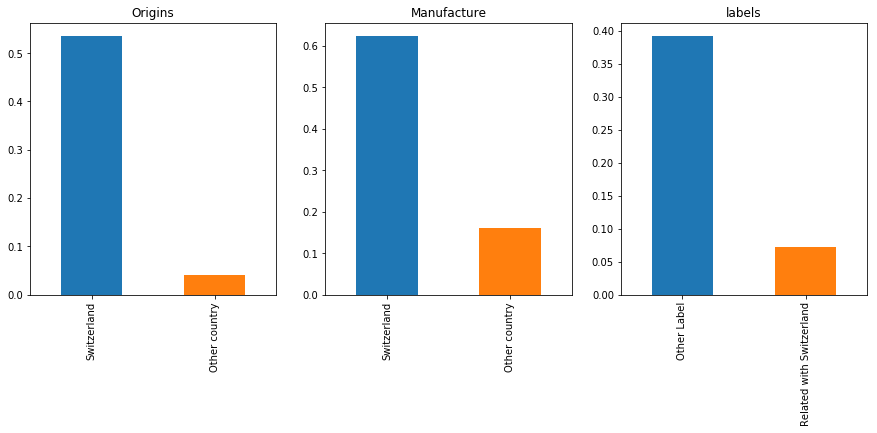

In [261]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
plt.subplot(1,3,1)
(prodLaitSwitzerland["originsCat"].value_counts()/len(prodLaitSwitzerland["originsCat"])).plot(kind='bar',title='Origins')
plt.subplot(1,3,2)
(prodLaitSwitzerland["manuCat"].value_counts()/len(prodLaitSwitzerland["manuCat"])).plot(kind='bar',title='Manufacture')
plt.subplot(1,3,3)
(prodLaitSwitzerland["labCat"].value_counts()/len(prodLaitSwitzerland["labCat"])).plot(kind='bar',title='labels')
plt.show()

In [262]:
print("Date of first upload: ", min(prodLaitSwitzerland['created_datetime']))
print("Date of last upload retrieved: ", max(prodLaitSwitzerland['created_datetime']))

Date of first upload:  2012-05-22 12:49:18
Date of last upload retrieved:  2018-10-22 12:59:26


Origins

array([<matplotlib.axes._subplots.AxesSubplot object at 0x164872710>,
      dtype=object)

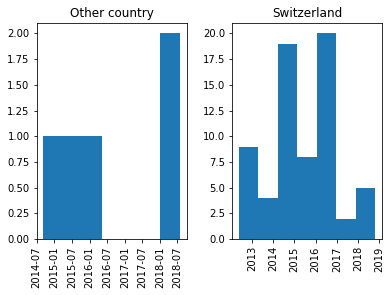

In [263]:
prodLaitSwitzerland['created_datetime'].hist(by=prodLaitSwitzerland['originsCat'],bins=7)

In [264]:
prodLaitSwitzerland['year'] = np.ones(len(prodLaitSwitzerland['created_datetime']))
for i in range (0, len(prodLaitSwitzerland['year'])):
    prodLaitSwitzerland['year'].iloc[i] = prodLaitSwitzerland['created_datetime'].iloc[i].year

In [265]:
prodLaitSwitzerland['year'] = prodLaitSwitzerland['year'].astype(str)

In [266]:
prodLaitSwitzerland = pd.get_dummies(prodLaitSwitzerland, columns=['originsCat'])

In [288]:
temp = prodLaitSwitzerland.groupby(['year'])['originsCat_Switzerland'].sum()

In [279]:
temp = temp[0:4]

In [289]:
temp

year
2012.0     4
2013.0     6
2014.0    21
2015.0     9
2016.0    21
2017.0     1
2018.0     5
Name: originsCat_Switzerland, dtype: uint8

In [301]:
temp2 = consSwit.loc[(consSwit.index== 'Lait et produits laitiers')]
temp2

,2007,2008,2009,2010,2011,2012,2013,2014,2015
products,,,,,,,,,
Lait et produits laitiers,255.683841,252.642256,245.855948,248.891431,252.199542,247.679618,251.584253,248.167039,246.696216


In [ ]:
##Take into account this quantity(?) for evolu

Manufacture

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1626eebe0>,
      dtype=object)

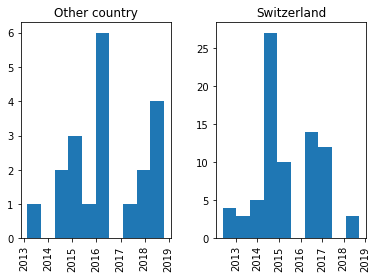

In [201]:
prodLaitSwitzerland['created_datetime'].hist(by=prodLaitSwitzerland['manuCat'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x162a6d320>,
      dtype=object)

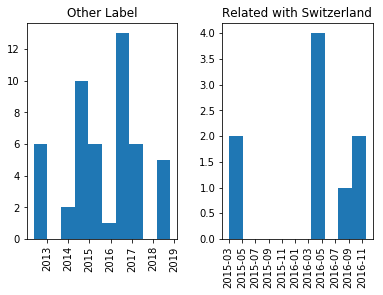

In [202]:
prodLaitSwitzerland['created_datetime'].hist(by=prodLaitSwitzerland['labCat'])

## 2. A first perspective: Compare old vs new products inside the dataset

A product in the dataset is considered "old" if its description was uploaded to the dataset before February 2017. By the contrary, it is considered as "new" if its description was uploaded after that date.

_As that definition is a little rigid, in order to get closer to the real situation, the following assumption is made: From the total products uploaded to the dataset after February 2017, 20% are old products._  

A first perspective to tackle the research question, is to compare how in this more than 6 years of existance of the dataset, the characteristics of the products have changed. Specifically, we would like to know if there have been some changes in the origin of the primary resources, or in the origin of the manufacture or in the labels of the products.

The study of the evolution in time of each one of those features, will include an __exploratory data analysis__.
Finally, a study including the three features will be done, aiming to find an aggregated differentiated behavior in time, reflected in different clusters of periods of time. For that the __K-modes algorithm__ will be used.

The uploads of products sold in Switzerland, behaves differently in time. Taking into account the histogram presented below, two periods of time are defined:
- Period 1: Created for studying the behaviour from "old" products. Products uploaded before Feb 2017.
- Period 2: Created for studying the behaviour from "new" products. Products uploaded after Feb 2017.

Old products:  11826.8
New products:  1627.2


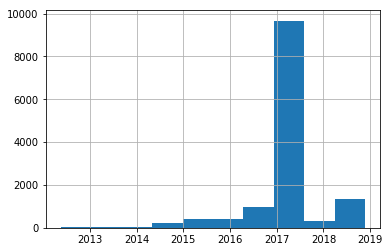

In [180]:
rateOldInNew = 0.2
old_products = len(foodSwitzerland[foodSwitzerland['created_datetime']<"2017-03-01 00:00:00"])
print("Old products: ", old_products + (len(foodSwitzerland)-old_products)*(rateOldInNew))
print("New products: ", (len(foodSwitzerland)-old_products)*(1-rateOldInNew))
foodSwitzerland['created_datetime'].hist()

Now, let's do the subdivision in the two periods, taking care of our assumption of 20%:

In [11]:
foodSwitzerlandBef = foodSwitzerland[foodSwitzerland['created_datetime']<"2017-03-01 00:00:00"]
foodSwitzerlandAft = foodSwitzerland[foodSwitzerland['created_datetime']>="2017-03-01 00:00:00"]

befInAft = foodSwitzerlandAft.sample(n=int(rateOldInNew*len(foodSwitzerlandAft)), replace=False)
foodSwitzerlandBef = pd.concat([foodSwitzerlandBef,befInAft],axis=0)

for i in range (0,len(befInAft)):
    foodSwitzerlandAft = foodSwitzerlandAft[foodSwitzerlandAft['code']!=befInAft['code'].iloc[i]]
print("Number of Old products: ", np.shape(foodSwitzerlandBef))
print("Number of New products: ", np.shape(foodSwitzerlandAft))

Number of Old products:  (11826, 176)
Number of New products:  (1627, 176)


### 2.1. Study of the evolution in time of each one of the interest features

### 2.1.1 With respect to: Origin of the primary resources

First, bootstrapping for include confidence intervals to results

In [27]:
#before
propSB_100ite = np.zeros (100)
propOCB_100ite = np.zeros (100)
#after
propSA_100ite = np.zeros (100)
propOCA_100ite = np.zeros (100)

for iteration in range(0,100):
    #before
    temp_bef = foodSwitzerlandBef["originsCat"].sample(n=len(foodSwitzerlandBef), replace=True)
    propSB_100ite[iteration] = (sum(temp_bef=="Switzerland")/len(foodSwitzerlandBef))
    propOCB_100ite[iteration] = sum(temp_bef=="Other country")/len(foodSwitzerlandBef)
    #after
    temp_aft = foodSwitzerlandAft["originsCat"].sample(n=len(foodSwitzerlandAft), replace=True)
    propSA_100ite[iteration] = sum(temp_aft=="Switzerland")/len(foodSwitzerlandAft)
    propOCA_100ite[iteration] = sum(temp_aft=="Other country")/len(foodSwitzerlandAft)
    
    #Relation of time evolution and difference of products in each categories
    difpropB = propSB_100ite[iteration]-propOCB_100ite[iteration]
    difpropA = propSB_100ite[iteration]-propOCA_100ite[iteration]

#Calculating standard deviation of count of each category
SBstd = np.std(propSB_100ite)
OCBstd = np.std(propOCB_100ite)
#Calculating standard deviation of count of each category
SAstd = propSA_100ite.std()
OCAstd = propOCA_100ite.std()

Then, plotting of behavior 

There was not information for  11167  products in the period 1.
There was not information for  1544  products in the period 2.


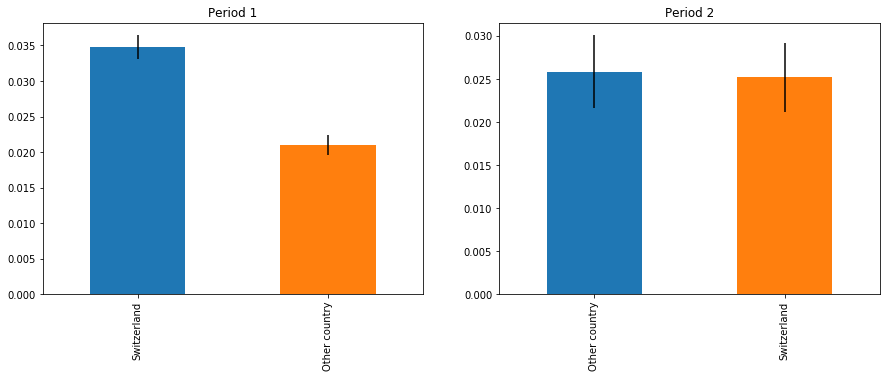

In [28]:
#Report information of NAN cases
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
print("There was not information for ",len(foodSwitzerlandBef["originsCat"])-sum(foodSwitzerlandBef["originsCat"]=="Switzerland")-sum(foodSwitzerlandBef["originsCat"]=="Other country")," products in the period 1.")
print("There was not information for ",len(foodSwitzerlandAft["originsCat"])-sum(foodSwitzerlandAft["originsCat"]=="Switzerland")-sum(foodSwitzerlandAft["originsCat"]=="Other country")," products in the period 2.")

#Plot origin of primary resources by periods
plt.subplot(1,2,1)
(foodSwitzerlandBef["originsCat"].value_counts()/len(foodSwitzerlandBef["originsCat"])).plot(kind='bar', yerr = [SBstd,OCBstd],title='Period 1')
plt.subplot(1,2,2)
(foodSwitzerlandAft["originsCat"].value_counts()/len(foodSwitzerlandAft["originsCat"])).plot(kind='bar', yerr = [SAstd,OCAstd],title='Period 2')

plt.show()

### 2.1.2 With respect to: Manufacture

First, bootstrapping for include confidence intervals to results

In [29]:
#before
propSB_100ite = np.zeros (100)
propOCB_100ite = np.zeros (100)

#after
propSA_100ite = np.zeros (100)
propOCA_100ite = np.zeros (100)

for iteration in range(0,100):
    #before
    temp_bef = foodSwitzerlandBef["manuCat"].sample(n=len(foodSwitzerlandBef), replace=True)
    propSB_100ite[iteration] = sum(temp_bef=="Switzerland")/len(foodSwitzerlandBef)
    propOCB_100ite[iteration] = sum(temp_bef=="Other country")/len(foodSwitzerlandBef)
    #after
    temp_aft = foodSwitzerlandAft["manuCat"].sample(n=len(foodSwitzerlandAft), replace=True)
    propSA_100ite[iteration] = sum(temp_aft=="Switzerland")/len(foodSwitzerlandAft)
    propOCA_100ite[iteration] = sum(temp_aft=="Other country")/len(foodSwitzerlandAft)
    

#Calculating standard deviation of count of each category
SBstd = propSB_100ite.std()
OCBstd = propOCB_100ite.std()
#Calculating standard deviation of count of each category
SAstd = propSA_100ite.std()
OCAstd = propOCA_100ite.std()

There was not information for  10871  products in the period 1.
There was not information for  1487  products in the period 2.


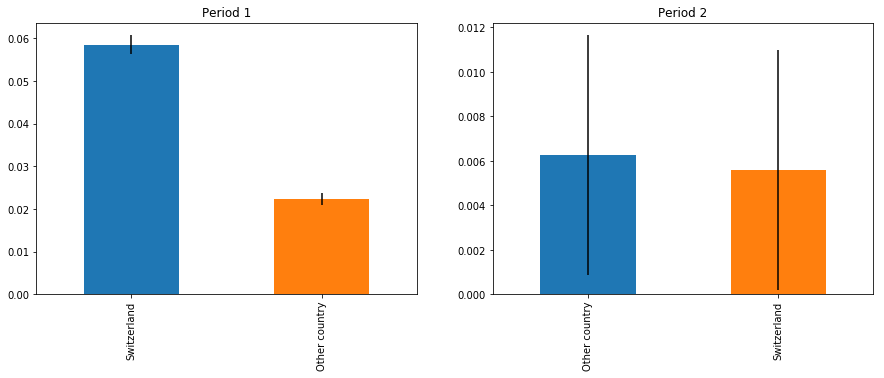

In [30]:
#Report information of NAN cases
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
print("There was not information for ",len(foodSwitzerlandBef["manuCat"])-sum(foodSwitzerlandBef["manuCat"]=="Switzerland")-sum(foodSwitzerlandBef["manuCat"]=="Other country")," products in the period 1.")
print("There was not information for ",len(foodSwitzerlandAft["manuCat"])-sum(foodSwitzerlandAft["manuCat"]=="Switzerland")-sum(foodSwitzerlandAft["manuCat"]=="Other country")," products in the period 2.")

#Plot origin of primary resources by periods
plt.subplot(1,2,1)
(foodSwitzerlandBef["manuCat"].value_counts()/len(foodSwitzerlandBef["manuCat"])).plot(kind='bar', yerr = [SBstd,OCBstd],title='Period 1')
plt.subplot(1,2,2)
(foodSwitzerlandAft["manuCat"].value_counts()/len(foodSwitzerlandBef["manuCat"])).plot(kind='bar', yerr = [SAstd,OCAstd],title='Period 2')

plt.show()

### 2.1.3 With respect to: Labels

In [31]:
#before
propSB_100ite = np.zeros (100)
propOCB_100ite = np.zeros (100)
#after
propSA_100ite = np.zeros (100)
propOCA_100ite = np.zeros (100)

for iteration in range(0,100):
    #before
    temp_bef = foodSwitzerlandBef["labCat"].sample(n=len(foodSwitzerlandBef), replace=True)
    propSB_100ite[iteration] = sum(temp_bef=="Related with Switzerland")/len(foodSwitzerlandBef)
    propOCB_100ite[iteration] = sum(temp_bef=="Other Label")/len(foodSwitzerlandBef)
    #after
    temp_aft = foodSwitzerlandAft["labCat"].sample(n=len(foodSwitzerlandAft), replace=True)
    propSA_100ite[iteration] = sum(temp_aft=="Related with Switzerland")/len(foodSwitzerlandAft)
    propOCA_100ite[iteration] = sum(temp_aft=="Other Label")/len(foodSwitzerlandAft)
    
    #Relation of time evolution and difference of products in each categories
    difpropB = propSB_100ite[iteration]-propOCB_100ite[iteration]
    difpropA = propSB_100ite[iteration]-propOCA_100ite[iteration]

#Calculating standard deviation of count of each category
SBstd = propSB_100ite.std()
OCBstd = propOCB_100ite.std()
#Calculating standard deviation of count of each category
SAstd = propSA_100ite.std()
OCAstd = propOCA_100ite.std()

There was not information for  11826  products in the period 1.
There was not information for  1627  products in the period 2.


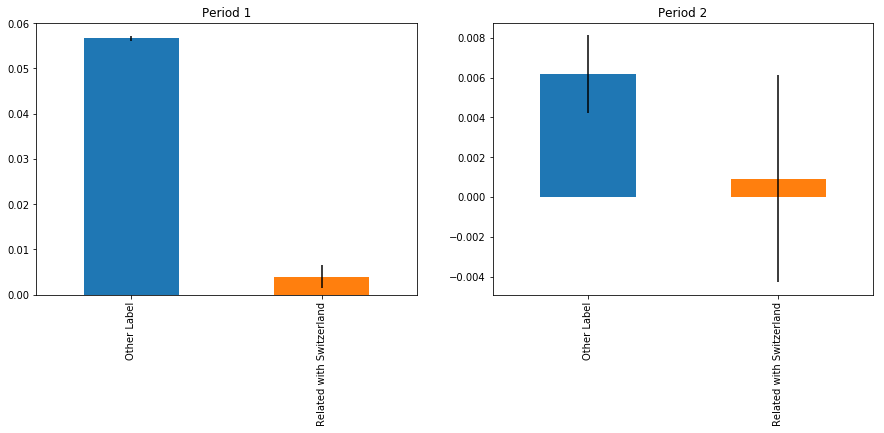

In [32]:
#Report information of NAN cases
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
print("There was not information for ",len(foodSwitzerlandBef["labCat"])-sum(foodSwitzerlandBef["labCat"]=="Switzerland")-sum(foodSwitzerlandBef["labCat"]=="Other country")," products in the period 1.")
print("There was not information for ",len(foodSwitzerlandAft["labCat"])-sum(foodSwitzerlandAft["labCat"]=="Switzerland")-sum(foodSwitzerlandAft["labCat"]=="Other country")," products in the period 2.")

#Plot origin of primary resources by periods
plt.subplot(1,2,1)
(foodSwitzerlandBef["labCat"].value_counts()/len(foodSwitzerlandBef["labCat"])).plot(kind='bar', yerr = [SBstd,OCBstd],title='Period 1')
plt.subplot(1,2,2)
(foodSwitzerlandAft["labCat"].value_counts()/len(foodSwitzerlandBef["labCat"])).plot(kind='bar', yerr = [SAstd,OCAstd],title='Period 2')

plt.show()

### 2.2 Study of the evolution in time of the interest features combined

The k-modes algorithm is expected to be done for the milestone 3.